# Estudos SEABORN

- Biblioteca de visualização de dados.
- Possui excelente estilo, onde gráficos complexos são criados com poucas linhas de 
  código.
- Foi projetada para trabalhar com data frames.

# Plots de Distribuição

In [1]:
import seaborn as sns
%matplotlib inline

In [5]:
# A biblioteca tem alguns sets de dados para análise, neste passo, vou carregar o set 'tips'
tips = sns.load_dataset("tips")

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


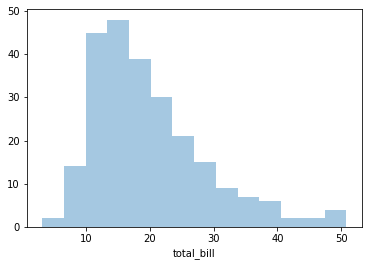

In [13]:
# O método distplot cria um histograma com os dados inseridos, note que este método já trabalha bem com data frames.
# Não precisei fazer quase nada, simplesmente passei a coluna que eu quero analisar.

ax = sns.distplot(tips['total_bill'], kde=False)

In [15]:
# Função jointplot(), analisa se há alguma relação entre duas variáveis.
# Esta função pede basicamente três parametros -> x, y e o dataset.

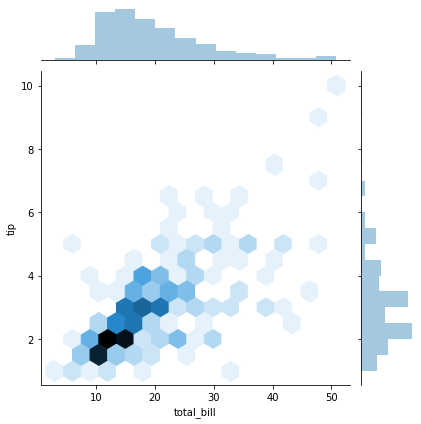

In [18]:
sns.jointplot(x = 'total_bill', y='tip', data=tips, kind = 'hex',)

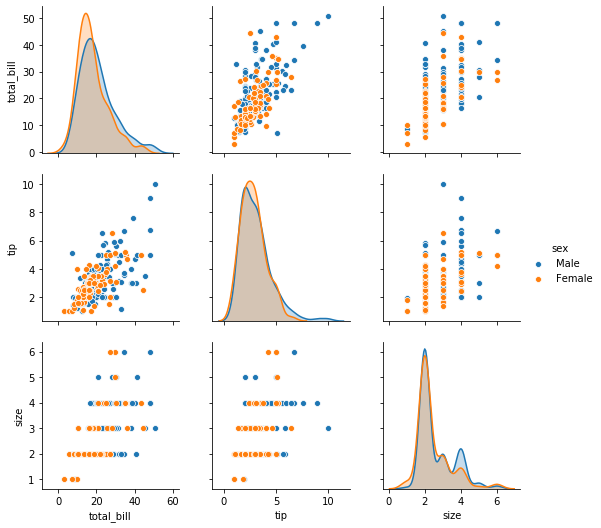

In [24]:
# Função pairplot() -> Traça jointplots entre todas as variáveis numéricas.
sns.pairplot(tips, hue = 'sex')

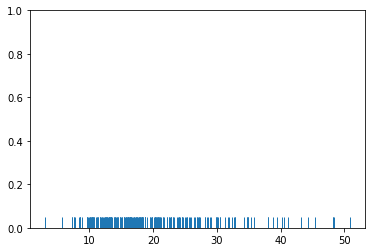

In [25]:
sns.rugplot(tips['total_bill'])

# Plots Categóricos

In [26]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [27]:
tips = sns.load_dataset('tips')

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


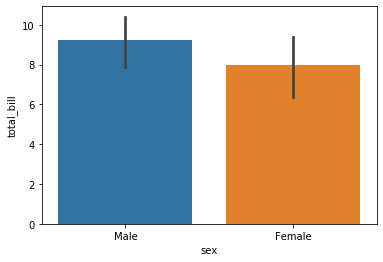

In [30]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator = np.std)

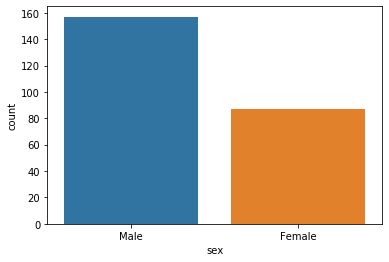

In [31]:
sns.countplot('sex',data = tips)

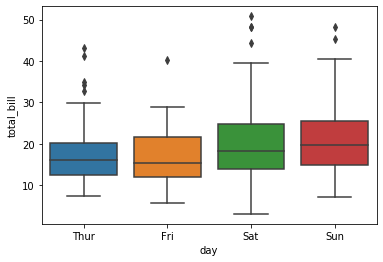

In [32]:
sns.boxplot(x='day', y='total_bill', data=tips)

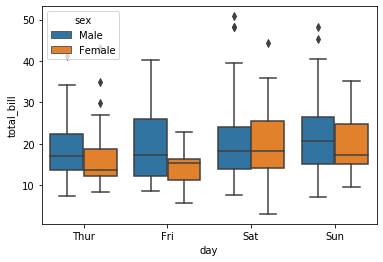

In [33]:
# Consigo categorizar o plot de acordo com outra categoria através do parametro hue
sns.boxplot(x='day', y='total_bill', data=tips, hue = 'sex')

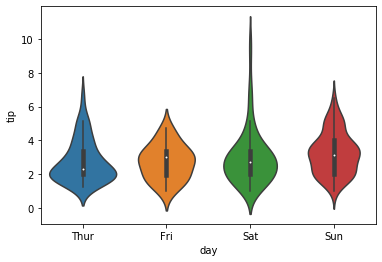

In [34]:
sns.violinplot(x = 'day', y = 'tip', data=tips)

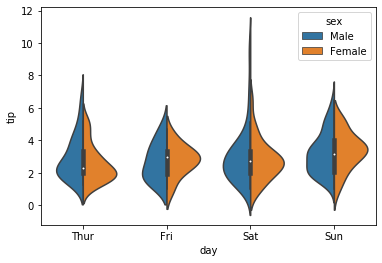

In [35]:
sns.violinplot(x = 'day', y = 'tip', data=tips, hue='sex', split=True)

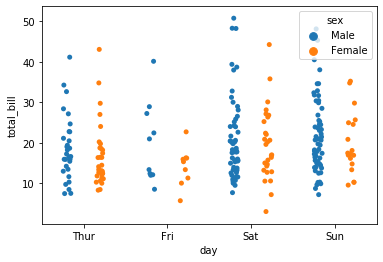

In [37]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex', dodge=True)

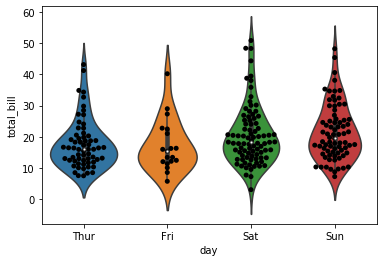

In [40]:
# Comsigo combinar dois tipos de plot diferentes na mesma análise e com isso ter mais insights
sns.swarmplot(x='day', y='total_bill', data=tips,color='black')
sns.violinplot(x='day', y='total_bill', data=tips)

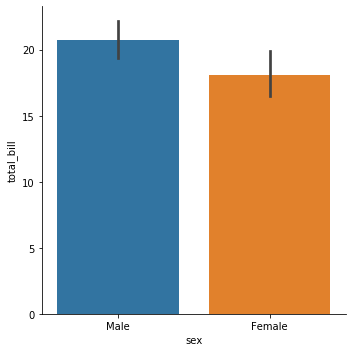

In [44]:
sns.catplot(x='sex', y='total_bill', data=tips,kind='bar')

# Plots matriciais

In [45]:
import seaborn as sns
%matplotlib inline

In [46]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

In [47]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
# Traz a correlação entre informações numéricas
crr = tips.corr()

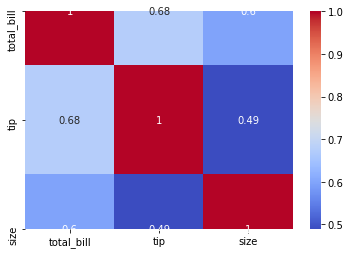

In [54]:
sns.heatmap(crr,cmap='coolwarm', annot=True)

In [56]:
pf = flights.pivot_table(values='passengers', index='month', columns='year')

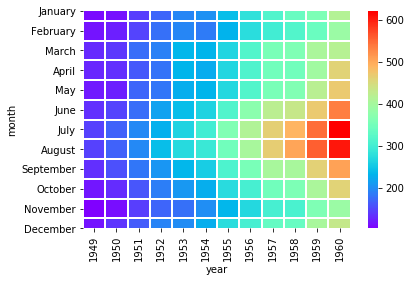

In [61]:
sns.heatmap(pf,cmap='rainbow', linewidth = 1)

# Plots de regressão

In [62]:
tips = sns.load_dataset('tips')

In [63]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


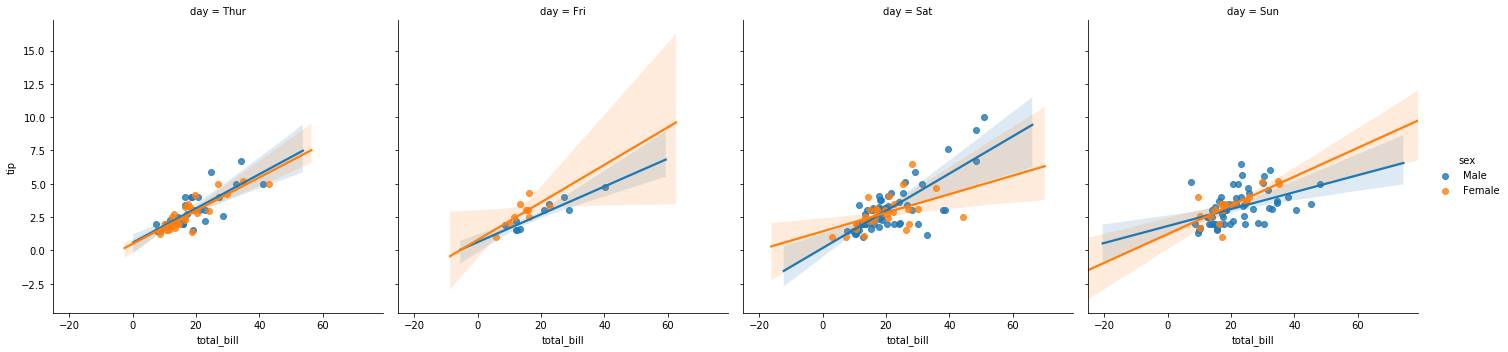

In [72]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='day')
# lmplot() -> Função para gerar um modelo linear em cima dos dados
# Parametros:
# x = valores em x -> passamos a coluna do dataframe
# y = valores em y -> passamos a coluna do dataframe
# data -> passamos o dataframe que será utilizado
# hue -> subdivisao dos dados em modelos lineares diferentes-> passo uma coluna de interesse
# col -> subdivisao dos dados em gráficos diferentes

# PairGrids

In [83]:
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')

In [84]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

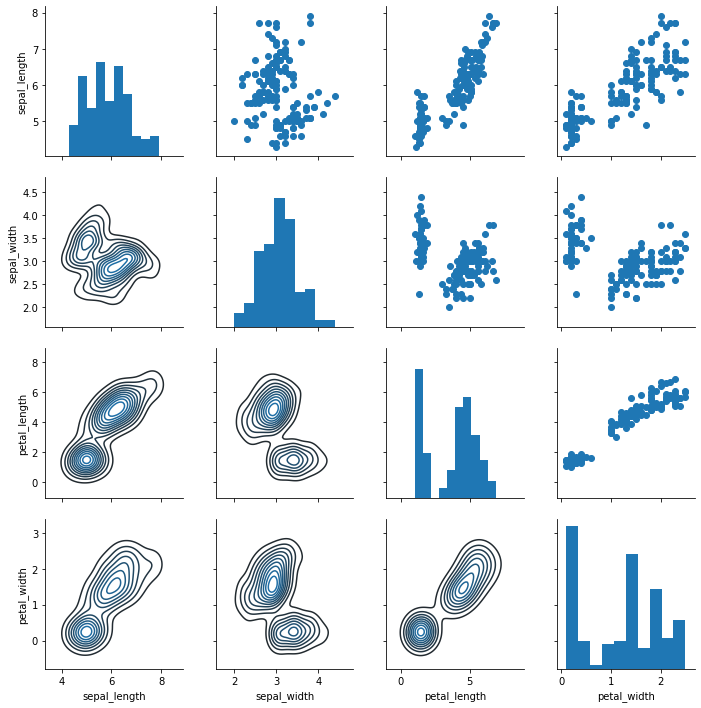

In [87]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [88]:
tips = sns.load_dataset('tips')

In [89]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


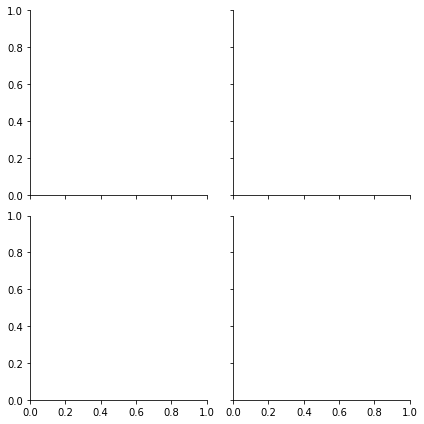

In [90]:
f = sns.FacetGrid(tips,col='time', row='smoker')

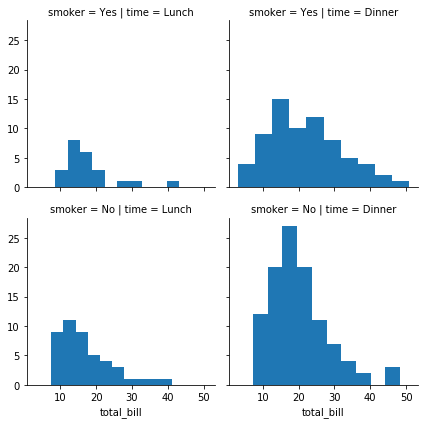

In [94]:
f = sns.FacetGrid(tips,col='time', row='smoker')
f.map(plt.hist,'total_bill')

# Estilos e cores

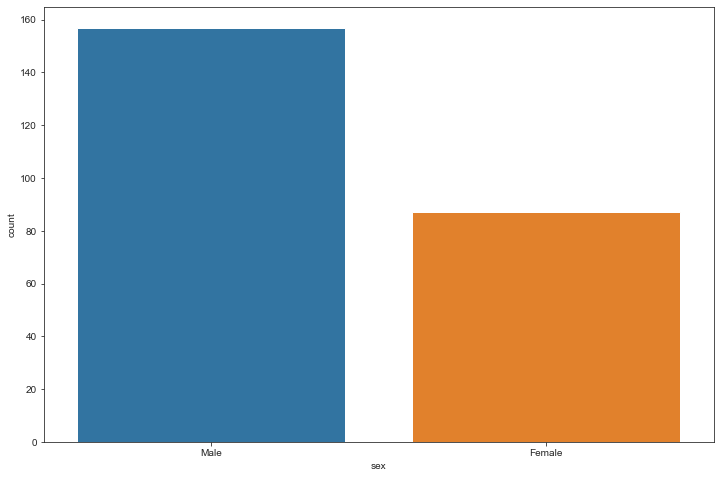

In [98]:
sns.set_style('ticks')
# Por ser uma biblioteca derivada da matplotlib, posso utilizar metodos desta biblioteca
plt.figure(figsize=(12,8))
sns.countplot(x='sex',data=tips)
